# Statistical Implementation on Tips Data

## Importing Libraries

In [126]:
import seaborn as sns
import pandas as pd
import statistics
import matplotlib.pyplot as plt

## Importing Data Set

In [81]:
file = sns.load_dataset('tips')
file.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [82]:
file.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [83]:
file.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Label Encoding

In [87]:
file['sex'] = file['sex'].map({"Male":0, "Female":1})


In [119]:
print(file['sex'])

0      1
1      0
2      0
3      0
4      1
      ..
239    0
240    1
241    0
242    0
243    1
Name: sex, Length: 244, dtype: int64


In [89]:
file['sex'] = file['sex'].astype(int)

In [96]:
file['time'] = file['time'].map({"Lunch":0 , "Dinner":1})

In [98]:
file['smoker'] = file['smoker'].map({"Yes":1 ,"No":0})

In [92]:
file = pd.get_dummies(file, columns = ['day'], prefix = ['day'])

In [93]:
print(file)

     total_bill   tip  sex smoker    time  size  day_Thur  day_Fri  day_Sat  \
0         16.99  1.01    1     No  Dinner     2     False    False    False   
1         10.34  1.66    0     No  Dinner     3     False    False    False   
2         21.01  3.50    0     No  Dinner     3     False    False    False   
3         23.68  3.31    0     No  Dinner     2     False    False    False   
4         24.59  3.61    1     No  Dinner     4     False    False    False   
..          ...   ...  ...    ...     ...   ...       ...      ...      ...   
239       29.03  5.92    0     No  Dinner     3     False    False     True   
240       27.18  2.00    1    Yes  Dinner     2     False    False     True   
241       22.67  2.00    0    Yes  Dinner     2     False    False     True   
242       17.82  1.75    0     No  Dinner     2     False    False     True   
243       18.78  3.00    1     No  Dinner     2      True    False    False   

     day_Sun  
0       True  
1       True  
2     

## One Hot Encoding

In [94]:
file[['day_Thur', 'day_Fri', 'day_Sat', 'day_Sun']] = file[['day_Thur', 'day_Fri', 'day_Sat', 'day_Sun']].astype(int)

In [95]:
file['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [97]:
file['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [99]:
file.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,1,0,1,2,0,0,0,1
1,10.34,1.66,0,0,1,3,0,0,0,1
2,21.01,3.50,0,0,1,3,0,0,0,1
3,23.68,3.31,0,0,1,2,0,0,0,1
4,24.59,3.61,1,0,1,4,0,0,0,1


In [100]:
file.describe()

,total_bill,tip,sex,size,day_Thur,day_Fri,day_Sat,day_Sun
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.356557,2.569672,0.254098,0.077869,0.356557,0.311475
std,8.902412,1.383638,0.479967,0.951100,0.436248,0.268516,0.479967,0.464049
min,3.070000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,13.347500,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,17.795000,2.900000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,24.127500,3.562500,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
max,50.810000,10.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
file['time'] = file['time'].astype(int)

In [105]:
file['smoker'] = file['smoker'].astype(int)

In [109]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   time        244 non-null    int64  
 5   size        244 non-null    int64  
 6   day_Thur    244 non-null    int64  
 7   day_Fri     244 non-null    int64  
 8   day_Sat     244 non-null    int64  
 9   day_Sun     244 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 19.2 KB


## Finding Statistical Computation

In [111]:
print(statistics.stdev(file['smoker']))

0.48666699935945246


In [118]:
print(file.mean())

total_bill    19.785943
tip            2.998279
sex            0.356557
smoker         0.381148
time           0.721311
size           2.569672
day_Thur       0.254098
day_Fri        0.077869
day_Sat        0.356557
day_Sun        0.311475
dtype: float64


In [122]:
print(file['tip'].mean())

2.99827868852459


In [120]:
print(file['sex'].mean())

0.35655737704918034


In [116]:
print(file.median())

total_bill    17.795
tip            2.900
sex            0.000
smoker         0.000
time           1.000
size           2.000
day_Thur       0.000
day_Fri        0.000
day_Sat        0.000
day_Sun        0.000
dtype: float64


In [123]:
print(file['total_bill'].median())

17.795


In [117]:
print(file.mode())

   total_bill  tip  sex  smoker  time  size  day_Thur  day_Fri  day_Sat  \
0       13.42  2.0    0       0     1     2         0        0        0   

   day_Sun  
0        0  


In [115]:
print(file.std())

total_bill    8.902412
tip           1.383638
sex           0.479967
smoker        0.486667
time          0.449276
size          0.951100
day_Thur      0.436248
day_Fri       0.268516
day_Sat       0.479967
day_Sun       0.464049
dtype: float64


In [121]:
print(statistics.stdev(file['total_bill']))

8.902411954856856


## Visual Representation

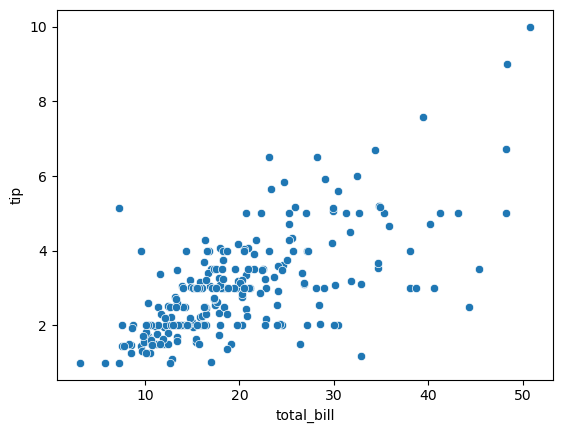

In [129]:
sns.scatterplot(data = file, x = 'total_bill', y = 'tip')
plt.show()

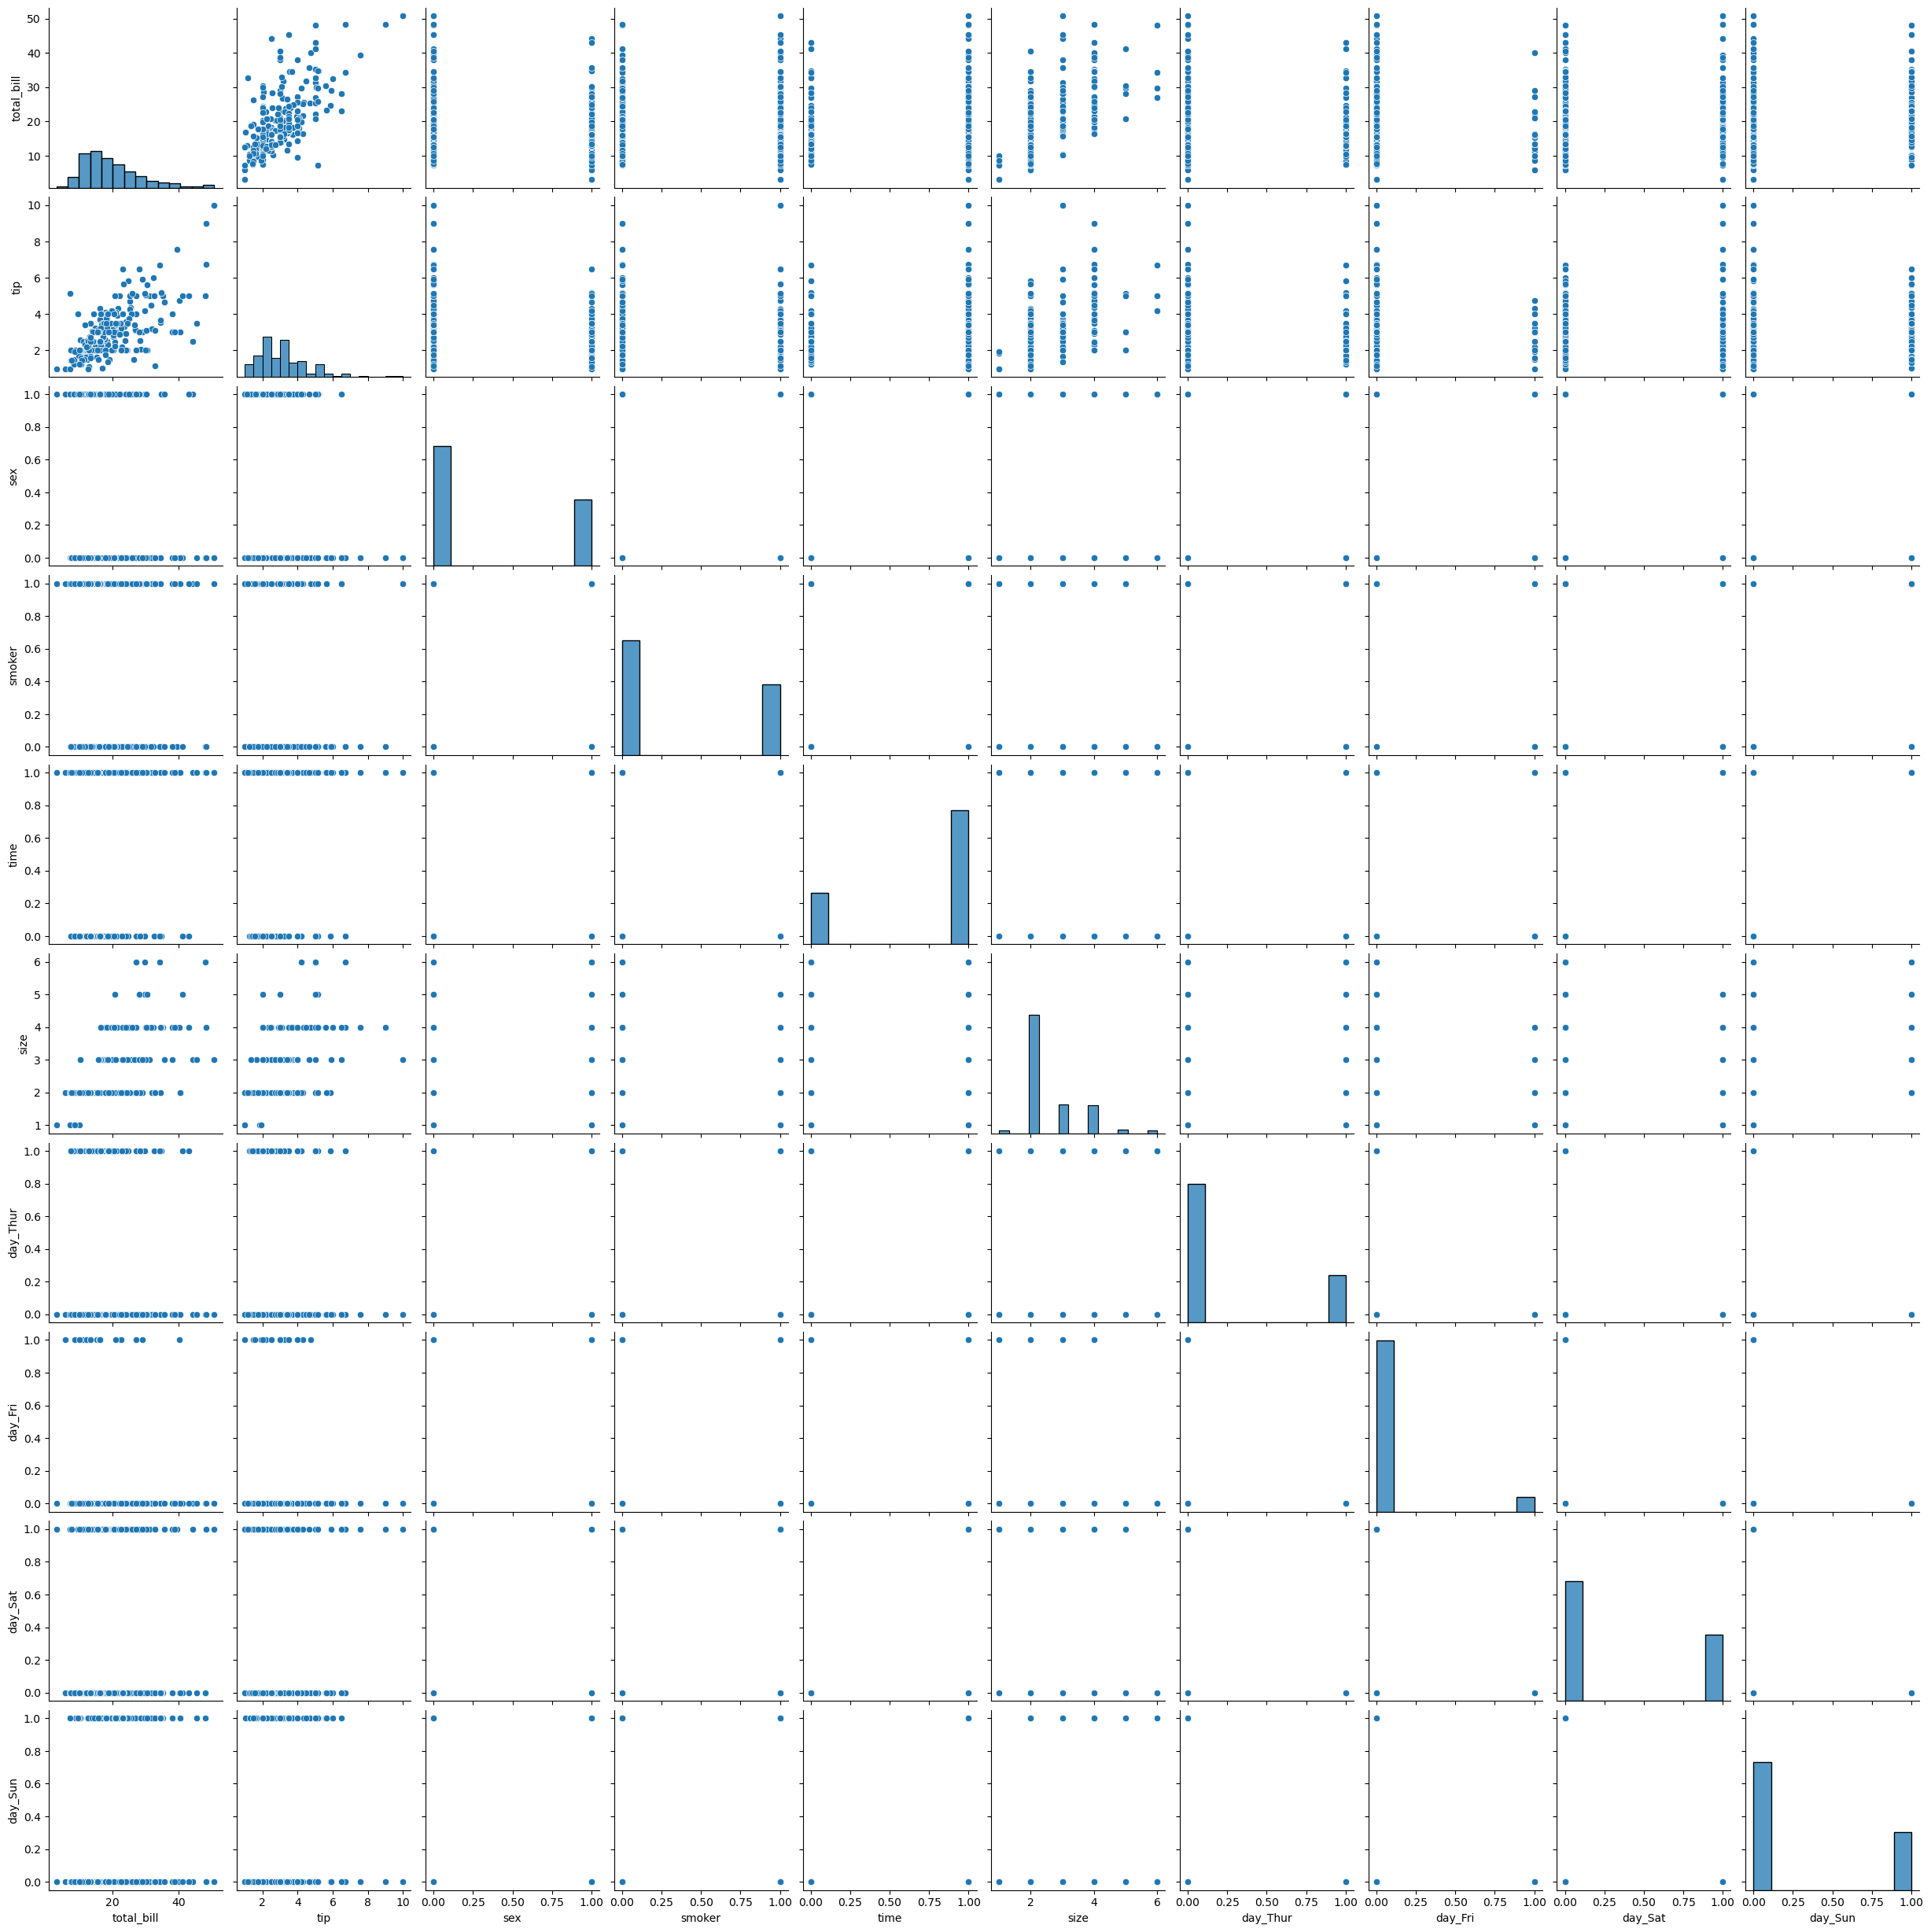

In [131]:
sns.pairplot(file)
plt.show()